# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

In this assignment the Iris dataset will be used.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris.

3. _(2 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(3 points)_ **Data inspection.** Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data. Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting). 

5. _(2 points)_ **Prepare the data for classification**. Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. First, instantiate the model and then run classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part. Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test. Also, comparing these two arrays (predicted classes and test Y) count the numbers of correct predictions and predictions that were wrong. (`NumPy` array can be compared with `==` operator and `NumPy` operator `count_nonzero` counts number of non-False).

9. _(2 points)_ Repeat the fit with **different number of neighbors (1, 3, 5, 10, 20, 50)**. Show how accuracy score and the number of correct predictions change with the number of neighbors.

In [1]:
# Here are all imports that you will need

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
#from sklearn.cross_validation import train_test_split 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


'from sklearn.cross_validation import train_test_split'  has been replaced by **from sklearn.model_selection** as cross_validation has been replaced by model_selection.<br/>

source:https://stackoverflow.com/questions/51149995/what-is-the-difference-between-sklearn-cross-validation-and-sklearn-model-estima
<br/>
cross_validation is an older package used previously in scikit. model_selection is newer replacement of the cross_validation (and some others too). It has some structural changes in the classes defined in it.

3. Load the data from the file (iris.data) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

In [2]:
# define column names after looking at the attribute information on page https://archive.ics.uci.edu/ml/datasets/Iris
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
#load data  with no header into the pandas data frame while assigning the column names
iris_df = pd.read_csv('iris.data.csv', header=None, names=column_names)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


4. **Data inspection.** Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data. Prepare 2 scatter plots - sepal_width vs sepal_length and petal_width vs petal_length. Scatter plots should show each class in different color (seaborn.lmplot is recommended for plotting).

In [3]:
#first five rows of data
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


The above shape and info methods have been implemented to check the number of rows and for data type of the data columns. It is observed that the  data is numerical except the 'class' column as it is string data type. There are 150 rows and 5 columns. There are no null values.


In [6]:
#to view the statsical summary of all variables 
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#to view the number of records per group
print('groupby(\'class\').size()'+'\n',iris_df.groupby('class').size())

groupby('class').size()
 class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


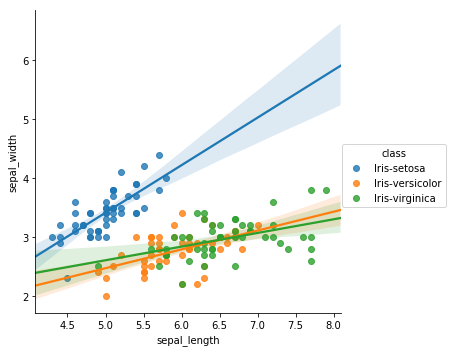

In [8]:
#scatter plot using lmplot Sepal length vs Sepal width
sns.lmplot(x="sepal_length", y="sepal_width",hue="class", data=iris_df);

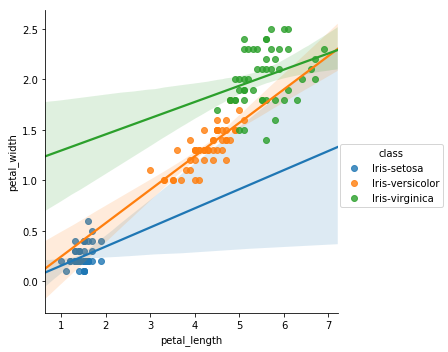

In [9]:
#scatter plot using lmplot Petal length vs Petal width
sns.lmplot(x="petal_length", y="petal_width",hue="class", data=iris_df);

There is some negative correlation between sepal length and width whereas there is positive correlation between petal length and width.

5. **Prepare the data for classification**. Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

In [10]:
#Defining design matrix x and target vector y while converting into numpy arrays.
X = np.array(iris_df.iloc[:, 0:4]) # sepal length, sepal width, petal length, petal width
Y = np.array(iris_df.iloc[:, 4])  # column class to be Y vector

In [11]:
X.shape

(150, 4)

In [12]:
Y.shape

(150,)

In [13]:
type(X)

numpy.ndarray

In [14]:
type(Y)

numpy.ndarray

6. **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

In [15]:
#splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [16]:
X_train.shape

(100, 4)

In [17]:
X_test.shape

(50, 4)

The train data has been selected with 100 samples and test with 50. 'random_state=42' parameter has been implemented so that the same data should be selected into train and test everytime the above code is executed.

7. **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`. First, instantiate the model and then run classifier on the training set.

In [18]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
#Run the fit
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

8. Use learning model to **predict the class from features**, run prediction on `X` from test part. Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test. Also, comparing these two arrays (predicted classes and test Y) count the numbers of correct predictions and predictions that were wrong. (`NumPy` array can be compared with `==` operator and `NumPy` operator `count_nonzero` counts number of non-False).

In [20]:
pred_iris = knn.predict(X_test)

In [21]:
print (accuracy_score(Y_test, pred_iris)*100,'%')

98.0 %


For k=3, the accuracy score is 98% which is very good.

In [22]:
np.count_nonzero(Y_test==pred_iris)

49

The above comparison of Y_test set with pred_iris returns the 49 non-false values, which shows that there is only 1 prediction which did not match the Y_test set. To verify the above I have quickly checked by just running the == operator on both the arrays.

In [23]:
Y_test==pred_iris

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

We can see there is only one False value in the above result array.

9. Repeat the fit with **different number of neighbors (1, 3, 5, 10, 20, 50)**. Show how accuracy score and the number of correct predictions change with the number of neighbors.

In [24]:
#creating a list for different number of neighbors
k_list=[1,3,5,10,20,50]
#empty list to store the accuracy store for each neighbour
K_accuracy_score=[]
#defining an empty list that will store correct prediction count for each value of K
k_correctPred=[]
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    K_accuracy_score.append(accuracy_score(Y_test, pred))
    k_correctPred.append(np.count_nonzero(Y_test==pred))

In [25]:
K_accuracy_score

[0.98, 0.98, 0.98, 0.98, 1.0, 0.92]

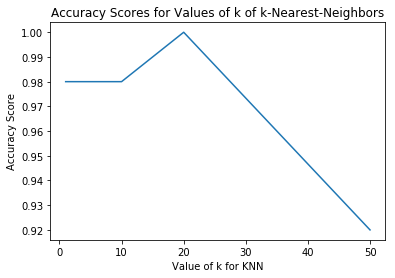

In [26]:
plt.plot(k_list, K_accuracy_score)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

The accuracy score is highest for k=20 and lowest for k=50. It is same for when k=1,3,5 and 10.
<br/>
Next to check the number of correct predictions for each value of K as follows:

In [27]:
k_correctPred

[49, 49, 49, 49, 50, 46]

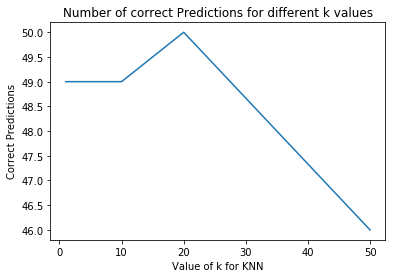

In [28]:
plt.plot(k_list, k_correctPred)
plt.xlabel('Value of k for KNN')
plt.ylabel('Correct Predictions')
plt.title('Number of correct Predictions for different k values')
plt.show()

The number of correct predictions graph matches the accuracy score graph. The number of correct predictions are 50 for  k=20 and lowest (46) for k=50. It is same for when k=1,3,5 and 10.

The accuracy score changes when the value of k changes from small number. For example k 10, 20 and 50.
